In [1]:
# import stuff

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import  pyplot, cm
import numpy

In [2]:
# declare variables

nx = 101 # points in i direction
ny = 101 # points in j direction
nt = 80 # number of timesteps

c = 1 # propagation speed

dx = 2 / (nx - 1) # size of x step based on number of i points
dy = 2 / (ny - 1) # same as above but in j direction

sigma = 0.2
dt = sigma * dx # stability criterion

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) # u component of velocity
v = numpy.ones((ny, nx)) # v component of velocity

un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

# set initial conditions, "square function"
u[int(0.5 / dx):int(1 / dx +1), int(0.5 / dx):int(1 / dx +1)] = 2
v[int(0.5 / dx):int(1 / dx +1), int(0.5 / dx):int(1 / dx +1)] = 2

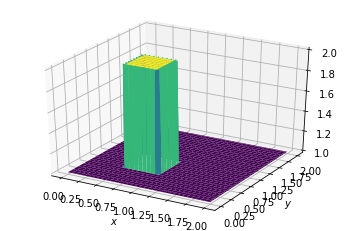

In [3]:
# visualise initial conditions

figure = pyplot.figure() # bring up a figure window
axes = figure.gca(projection = "3d")
X, Y = numpy.meshgrid(x, y)

axes.plot_surface(X, Y, u, cmap = cm.viridis)
axes.set_xlabel("$x$");
axes.set_ylabel("$y$");

In [4]:
# loop over the timesteps

for n in range(nt + 1):
    
    un = u.copy()
    vn = v.copy()
    
    u[1:, 1:] = un[1:, 1:] - un[1:, 1:] * dt / dx * (un[1:, 1:] - un[:-1, 1:]) \
                           - vn[1:, 1:] * dt / dy * (un[1:, 1:] - un[1:, :-1])
    
    v[1:, 1:] = un[1:, 1:] - un[1:, 1:] * dt / dx * (vn[1:, 1:] - vn[:-1, 1:]) \
                           - vn[1:, 1:] * dt / dy * (vn[1:, 1:] - vn[1:, :-1])
    
    # boundary conditions are always 1
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

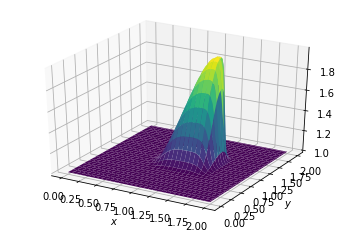

In [6]:
# solving and visualising the equation

figure = pyplot.figure()
axes = figure.gca(projection = "3d")
axes.plot_surface(X, Y, u, cmap = cm.viridis)
axes.set_xlabel("$x$");
axes.set_ylabel("$y$");